# Import Data and Clean Data

This dataset contains information about 891 people who were on board the 
ship when departed on April 15th, 1912. The challenge is to build a model 
to predict which people would survive based on the features in the dataset.

Name (str) - Name of the passenger

Pclass (int) - Ticket class

Sex (str) - Sex of the passenger

Age (float) - Age in years

SibSp (int) - Number of siblings and spouses aboard

Parch (int) - Number of parents and children aboard

Ticket (str) - Ticket number

Fare (float) - Passenger fare

Cabin (str) - Cabin number

Embarked (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check if the data is balanced

In [5]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

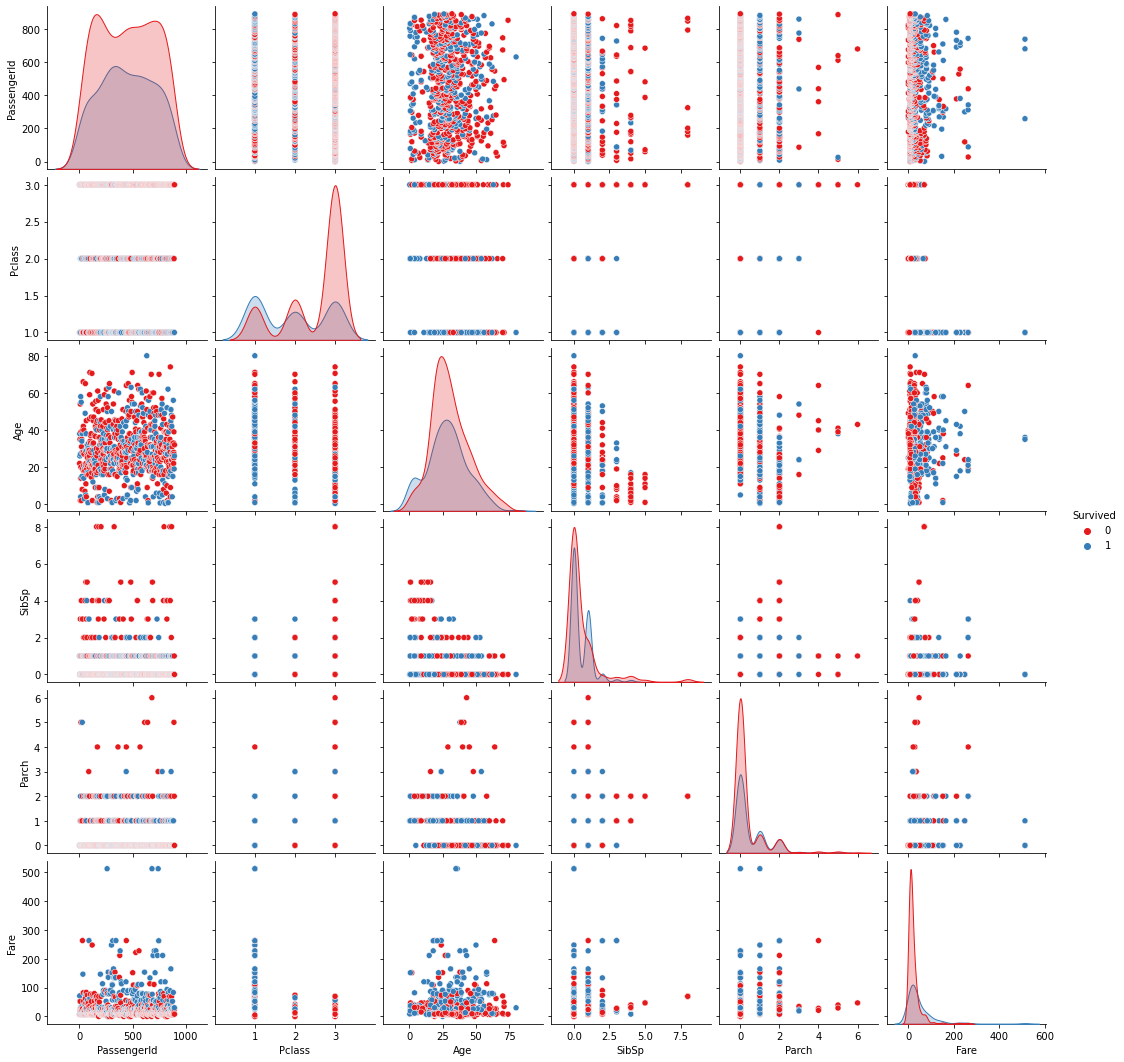

In [6]:
sns.pairplot(titanic, hue='Survived', palette='Set1' )

## Survival Rate

In [79]:
num_deaths = len(titanic[titanic["Survived"] == 0])
num_survived = len(titanic[titanic["Survived"] == 1])
print("Survival rate: {:.0%}".format(num_survived/(num_survived+num_deaths)))

Survival rate: 38%


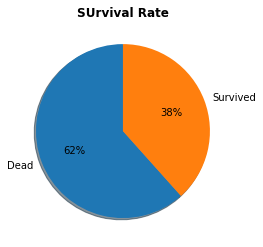

In [80]:
plt.pie([num_deaths, num_survived], labels=['Dead', 'Survived'], shadow=True, startangle=90, autopct ="%1.f%%")
plt.title('SUrvival Rate', fontweight = 'bold')
plt.show()

In [81]:
titanic.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [82]:
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


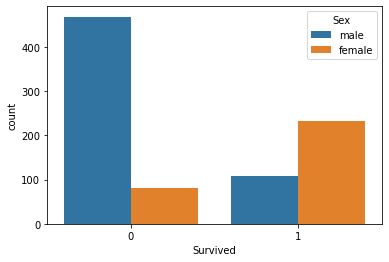

In [83]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

## Survival by Age & Fare & Pclass

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


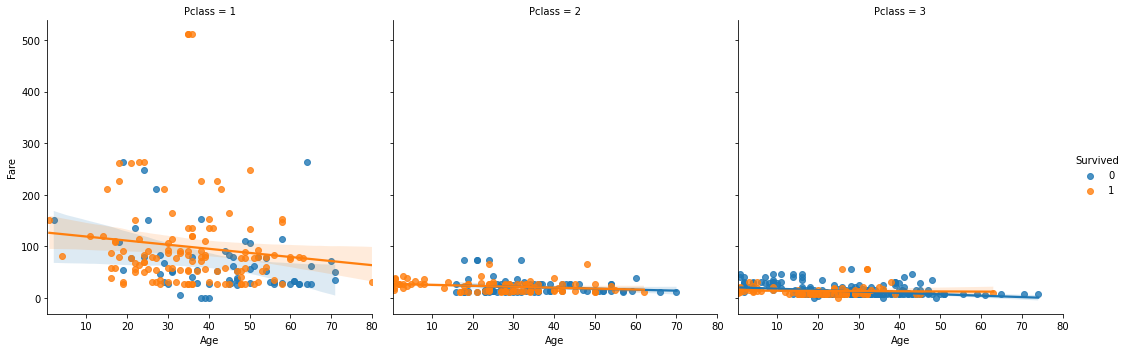

In [84]:
sns.lmplot(x='Age', y='Fare', hue='Survived', col='Pclass', data=titanic)

## Survival by SibSp and Parch

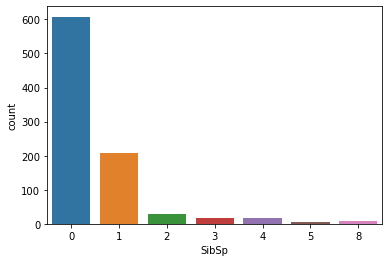

In [85]:
sns.countplot(x='SibSp', data=titanic)

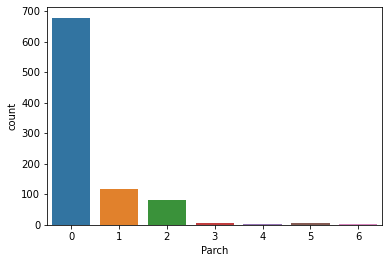

In [86]:
sns.countplot(x='Parch', data=titanic)

<Figure size 432x288 with 0 Axes>

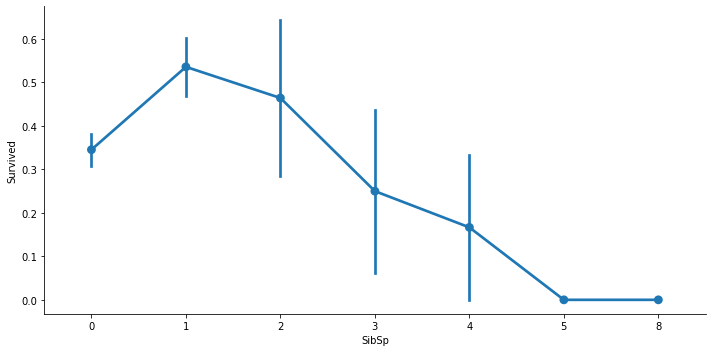

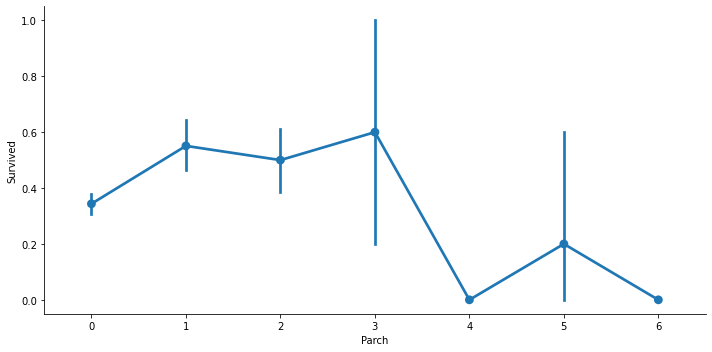

In [87]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

In [88]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

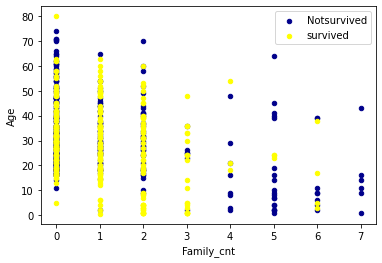

In [89]:
ax=titanic[titanic['Survived'] == 0].plot(kind='scatter',
                                            x='Family_cnt',
                                            y='Age',
                                            color='DarkBlue',
                                            label='Notsurvived');

titanic[titanic['Survived'] == 1].plot(kind='scatter',
                                       x='Family_cnt',
                                       y='Age',
                                       color='Yellow',
                                       label='survived',
                                       ax=ax);
plt.show()

## Survival by Age

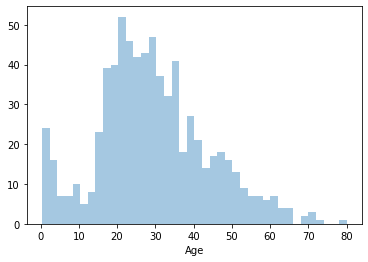

In [90]:
sns.distplot(titanic['Age'].dropna(), kde=False, bins=40)

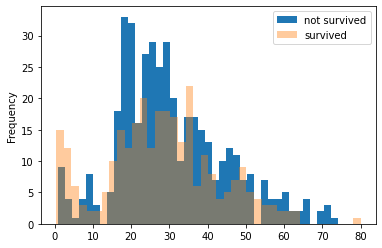

In [91]:
ax=titanic[titanic['Survived']==0]['Age'].plot.hist(bins=40)
titanic[titanic['Survived']==1]['Age'].plot.hist(bins=40, alpha=0.4)
plt.legend(['not survived', 'survived'])

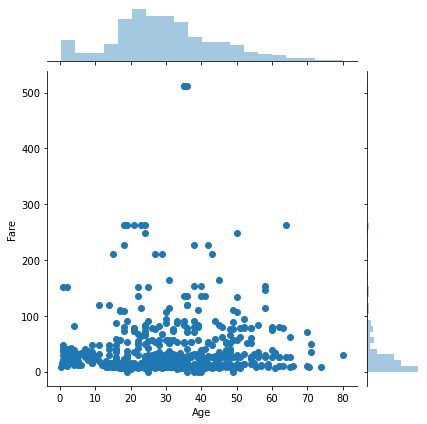

In [92]:
sns.jointplot(x='Age', y='Fare', data=titanic)

### Age Category

In [93]:
bins=[0,2,4,13,25, 60, 100]
Age_labels=['Infant','Toddler','Kid','Teen', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=Age_labels, right=False)
titanic['AgeGroup'].head()

0     Teen
1    Adult
2    Adult
3    Adult
4    Adult
Name: AgeGroup, dtype: category
Categories (6, object): [Infant < Toddler < Kid < Teen < Adult < Senior]

Text(0, 0.5, 'Number of Passengers')

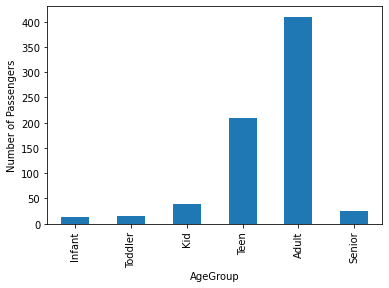

In [95]:
ax=titanic['Survived'].groupby(titanic['AgeGroup']).count().plot(kind='bar')
plt.ylabel('Number of Passengers')

In [107]:
survived=titanic[titanic['Survived']==1]
notsurvived=titanic[titanic['Survived']==0]

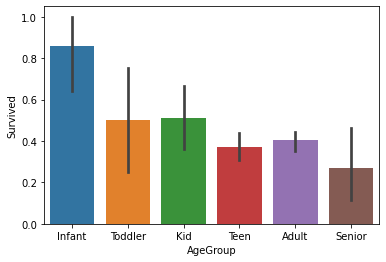

In [53]:
ax = sns.barplot(x="AgeGroup", y='Survived', data=titanic)

## Survival by Fare


Text(0.5, 1.0, 'Fare')

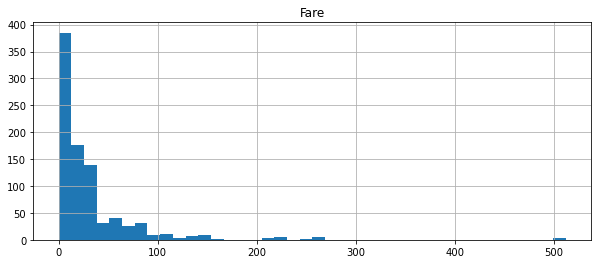

In [23]:
titanic['Fare'].hist(bins=40, figsize=(10,4))
plt.title('Fare')

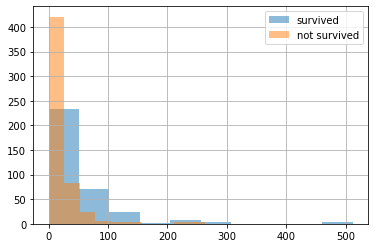

In [24]:
titanic[titanic['Survived']==1]['Fare'].hist( alpha=0.5, label='survived')
titanic[titanic['Survived']==0]['Fare'].hist( alpha=0.5, label='not survived')
plt.legend()

## Survival by Pclass

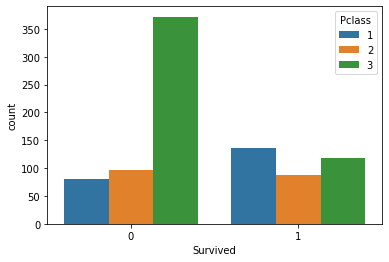

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

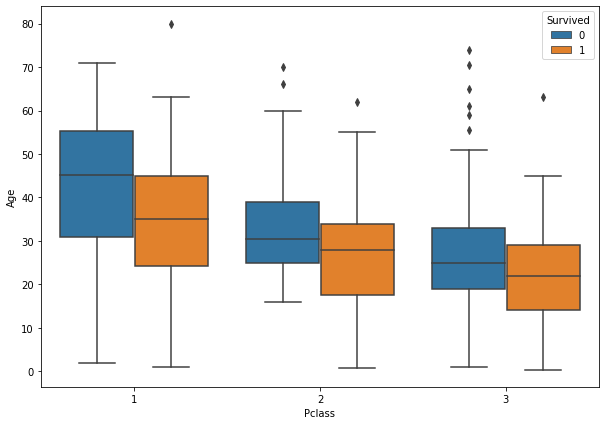

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic)

([<matplotlib.axis.XTick at 0x1e78af60470>,
 [Text(0, 0, 'Upper Class'),
  Text(0, 0, 'Middle Class'),
  Text(0, 0, 'Lower Class')])

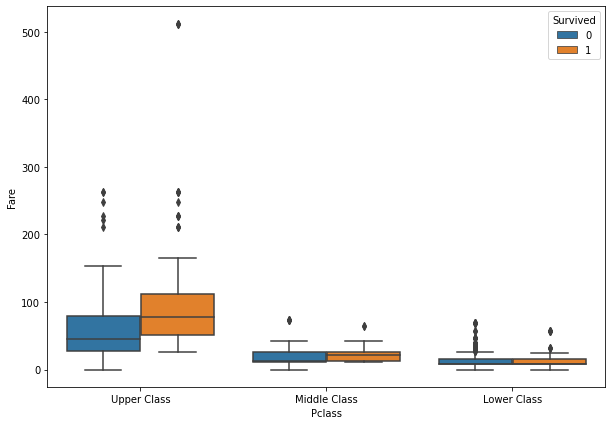

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Fare', data=titanic , hue='Survived' )
plt.xticks(np.arange(0, 3), ['Upper Class', 'Middle Class', 'Lower Class'])


The fare price for middle and lower class tickets were similar.

There is a large variation in fare prices for first class tickets.

# Family or noFamily

In [111]:
sibsp = titanic[titanic['SibSp'] > 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]
parch = titanic[titanic['Parch'] > 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]

In [112]:
family = pd.concat([sibsp, parch]).drop_duplicates()
nofamily = titanic[titanic['SibSp'] + titanic['Parch'] == 0][['PassengerId', 'SibSp', 'Parch', 'Survived']]


In [113]:
num_sibsp = len(sibsp)
num_parch = len(parch)
num_family = len(family)
num_nofamily = len(nofamily)

In [120]:
from scipy import stats
tscore, pvalue = stats.ttest_ind(family['Survived'], nofamily['Survived'], equal_var=False)
if pvalue < 0.05:
    result = 'A sigificant difference was found (p < 0.05)'
elif pvalue >=0.05:
    result = 'A sigificant difference was not found (p > 0.05)'
print(result)


A sigificant difference was found (p < 0.05)


# Clean continuous/categorical variables

In [28]:
titanic.isnull().values.any()

True

In [29]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt,AgeGroup
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False,True
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_cnt
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family_cnt,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


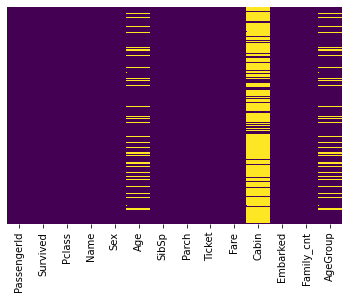

In [31]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### Fill missing for Age

In [32]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return round(titanic[titanic['Pclass']==1]['Age'].mean())
        elif Pclass==2:
            return round(titanic[titanic['Pclass']==2]['Age'].mean())
        else:
            return round(titanic[titanic['Pclass']==3]['Age'].mean())
    else:
        return Age
    
titanic['Age']=titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

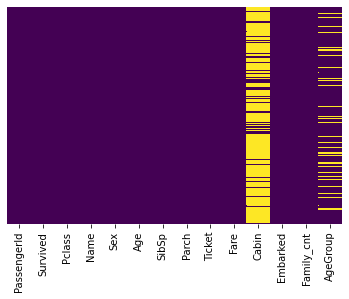

In [33]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### Fill in missing & create indicator for Cabin

In [34]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [35]:
titanic['Cabin_ind']=np.where(titanic['Cabin'].isnull(), 0, 1)

### Convert Embark to Dummy Variable

In [36]:
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)
titanic=pd.concat([titanic, embark], axis=1)

### Convert Sex to numeric

In [37]:
#or dictionary for sex (Convert to numberic)
gender_num={'male':0 , 'female':1}
titanic['Sex']=titanic['Sex'].map(gender_num)

### Drop unnnecessary variables

In [38]:
titanic.drop(['Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    int64   
 3   Age         891 non-null    float64 
 4   Fare        891 non-null    float64 
 5   Family_cnt  891 non-null    int64   
 6   AgeGroup    714 non-null    category
 7   Cabin_ind   891 non-null    int32   
 8   Q           891 non-null    uint8   
 9   S           891 non-null    uint8   
dtypes: category(1), float64(2), int32(1), int64(4), uint8(2)
memory usage: 48.2 KB


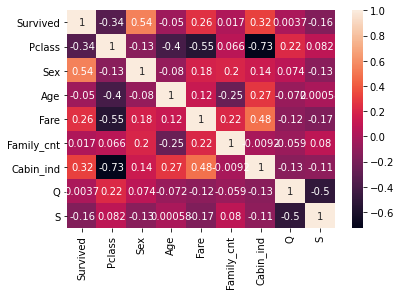

In [40]:
sns.heatmap(titanic.corr(), annot=True)

### Write out cleaned data

In [41]:
titanic.to_csv('titanic_cleaned.csv', index=False)

In [54]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,AgeGroup,Cabin_ind,Q,S
0,0,3,0,22.0,7.2500,1,Teen,0,0,1
1,1,1,1,38.0,71.2833,1,Adult,1,0,0
2,1,3,1,26.0,7.9250,0,Adult,0,0,1
3,1,1,1,35.0,53.1000,1,Adult,1,0,1
4,0,3,0,35.0,8.0500,0,Adult,0,0,1


# Conclusion

The overall survival rate is 38%

Children younger than 13 years old had a much higher chance of survival

Survival rate of women was higher than men

People travelling with other family members were more likely to survive